<a href="https://colab.research.google.com/github/sowmYaParim/Machine-learning-/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis on Terrorism Dataset**

Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Reading the dataset

In [8]:
terrorism_df = pd.read_csv('/content/globalterrorismdb_0718dist (1).csv', encoding='latin-1')
terrorism_df.head()



<ipython-input-8-2a6798911cfe>:1: DtypeWarning: Columns (4,31,33,62,76,79,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terrorism_df = pd.read_csv('/content/globalterrorismdb_0718dist (1).csv', encoding='latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


To view the shape of the dataset

In [9]:
print("There are {} rows and {} columns in the dataset".format(terrorism_df.shape[0],terrorism_df.shape[1]))


There are 18870 rows and 135 columns in the dataset


In [10]:
terrorism_df.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Checking the uniqueness of the columns of the dataset

In [12]:
No_of_cols=terrorism_df.columns.nunique()
print("There are total %d columns in the data"%No_of_cols)


There are total 135 columns in the data


Renaming the columns we are going to use for our analysis

In [13]:
terrorism_df=terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})


In [14]:
terrorism_df.head()


,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


Selecting only those columns which are actually required

In [15]:
terrorism_df=terrorism_df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]


In [16]:
terrorism_df.head()


,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary


Checking the updated shape of the dataset

In [17]:
terrorism_df.shape


(18870, 12)

Checking for the null values

In [18]:
terrorism_df.isnull().sum()


Year                 0
Month                0
Day                  0
Country              0
Region               0
State               85
City                 0
Attack_type          0
Target_type          0
Target_subtype    1061
Gang_name            0
Weapon_type          0
dtype: int64

Filling the NaN values

In [19]:
terrorism_df['Target_subtype'] = terrorism_df['Target_subtype'].fillna('others')
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')
terrorism_df['City']=terrorism_df['City'].fillna('Unknown')
terrorism_df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)
terrorism_df


,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
18865,1983,5,24,Colombia,South America,Santander,Vuelta de Acuna,Armed Assault,Military,Military Unit/Patrol/Convoy,Revolutionary Armed Forces of Colombia (FARC),Firearms
18866,1983,5,24,Colombia,South America,Valle del Cauca,Palmira,Unknown,Private Citizens & Property,Village/City/Town/Suburb,Revolutionary Armed Forces of Colombia (FARC),Unknown
18867,1983,5,24,Nicaragua,Central America & Caribbean,Chontales,Bartola,Armed Assault,Military,Military Unit/Patrol/Convoy,Democratic Revolutionary Alliance (ARDE),Firearms
18868,1983,5,24,Nicaragua,Central America & Caribbean,Nueva Segovia,Jalapa,Armed Assault,Military,Military Unit/Patrol/Convoy,Nicaraguan Democratic Force (FDN),Firearms


In [20]:
terrorism_df.shape


(18870, 12)

In [21]:
terrorism_df.head(10)


,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary


In [22]:
terrorism_df.columns.unique()


Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [23]:
terrorism_df.columns.nunique()


12

In [24]:
Total_countries=terrorism_df['Country'].nunique()
print("Total %d countries were noted in the data"%Total_countries)


Total 129 countries were noted in the data


In [25]:
print(terrorism_df['Region'].unique())


['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia']


In [26]:
print(terrorism_df['Attack_type'].unique())


['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [27]:
print(terrorism_df['Target_type'].unique())


['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [28]:
print(terrorism_df['Gang_name'].unique())


['MANO-D' '23rd of September Communist League' 'Unknown'
 'Black Nationalists' 'Tupamaros (Uruguay)' "New Year's Gang"
 'Weather Underground, Weathermen' 'Left-Wing Militants'
 'Armed Commandos of Liberation' 'Commune 1' 'Eritrean Liberation Front'
 'Strikers' 'Student Radicals' 'White extremists'
 'Armed Forces of National Liberation- Venezuela (FALN)'
 "New People's Army (NPA)"
 'Armed Revolutionary Independence Movement (MIRA)'
 'Popular Front for the Liberation of Palestine (PFLP)'
 'Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)'
 '1st of May Group' 'Rebel Armed Forces of Guatemala (FAR)' 'Ku Klux Klan'
 'Popular Revolutionary Vanguard (VPR)' 'Revolutionary Force 9'
 'Puerto Rican Nationalists' 'Chicano Liberation Front'
 'Puerto Rican Resistance Movement' 'Black Panthers'
 'Dominican Popular Movement (MPD)' 'Argentine Liberation Front (FAL)'
 'Argentine National Organization Movement (MANO)'
 'Japanese Red Army (JRA)' 'Saor Eire (Irish Republican Group)'
 'New W

In [29]:
print(terrorism_df['Gang_name'].nunique())


958


In [30]:
print(terrorism_df['Weapon_type'].unique())


['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment' 'Vehicle' 'Fake Weapons' 'Radiological' 'Other'
 'Biological']


In [31]:
terrorism_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18870 entries, 0 to 18869
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            18870 non-null  int64 
 1   Month           18870 non-null  int64 
 2   Day             18870 non-null  int64 
 3   Country         18870 non-null  object
 4   Region          18870 non-null  object
 5   State           18870 non-null  object
 6   City            18870 non-null  object
 7   Attack_type     18870 non-null  object
 8   Target_type     18870 non-null  object
 9   Target_subtype  18870 non-null  object
 10  Gang_name       18870 non-null  object
 11  Weapon_type     18870 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.7+ MB


In [32]:
terrorism_df.describe()


,Year,Month,Day
count,18870.000000,18870.000000,18870.000000
mean,1978.517011,6.198781,15.206465
std,3.409654,3.448318,8.955007
min,1970.000000,0.000000,0.000000
25%,1977.000000,3.000000,8.000000
50%,1979.000000,6.000000,15.000000
75%,1981.000000,9.000000,23.000000
max,1986.000000,12.000000,31.000000


In [33]:
terrorism_df['Country'].value_counts().head(10)


El Salvador       2547
United Kingdom    2087
United States     1711
Spain             1374
Italy             1226
Guatemala         1194
Colombia          1051
France             781
Peru               757
Turkey             593
Name: Country, dtype: int64

In [34]:
terrorism_df['Region'].value_counts().head(10)


Western Europe                 6390
Central America & Caribbean    4502
South America                  2651
Middle East & North Africa     2303
North America                  1852
Sub-Saharan Africa              500
Southeast Asia                  387
South Asia                      135
East Asia                        86
Eastern Europe                   36
Name: Region, dtype: int64

In [35]:
terrorism_df['State'].value_counts().head(10)


Northern Ireland    1877
San Salvador        1119
Unknown              761
Guatemala            528
Lazio                480
Basque Country       476
California           429
New York             410
Paris                340
Beirut               334
Name: State, dtype: int64

In [36]:
terrorism_df['Target_subtype'].value_counts().head(10)


Military Unit/Patrol/Convoy                                1100
others                                                     1061
Police Security Forces/Officers                             934
Government Building/Facility/Office                         801
Retail/Grocery/Bakery                                       776
Bank/Commerce                                               774
Politician or Political Party Movement/Meeting/Rally        746
Military Personnel (soldiers, troops, officers, forces)     685
Embassy/Consulate                                           643
Police Building (headquarters, station, school)             629
Name: Target_subtype, dtype: int64

In [37]:
terrorism_df['City'].value_counts().head(10)


Unknown           998
Belfast           972
San Salvador      920
Rome              459
Guatemala City    420
Paris             382
New York City     378
Beirut            332
Bogota            248
Madrid            244
Name: City, dtype: int64

In [38]:
terrorism_df['Attack_type'].value_counts().head(10)


Bombing/Explosion                      7991
Armed Assault                          3774
Assassination                          3511
Facility/Infrastructure Attack         1609
Hostage Taking (Kidnapping)             959
Unknown                                 573
Hostage Taking (Barricade Incident)     315
Hijacking                               105
Unarmed Assault                          33
Name: Attack_type, dtype: int64

In [39]:
terrorism_df['Gang_name'].value_counts().head(10)


Unknown                                             6501
Irish Republican Army (IRA)                         1332
Farabundo Marti National Liberation Front (FMLN)     778
Basque Fatherland and Freedom (ETA)                  768
Shining Path (SL)                                    515
Palestinians                                         416
Revolutionary Armed Forces of Colombia (FARC)        310
M-19 (Movement of April 19)                          259
Protestant extremists                                220
Red Brigades                                         209
Name: Gang_name, dtype: int64

In [ ]:
terrorism_df['Weapon_type'].value_counts().head(5)


**Visualizing the dataset**

Attack by weapons type

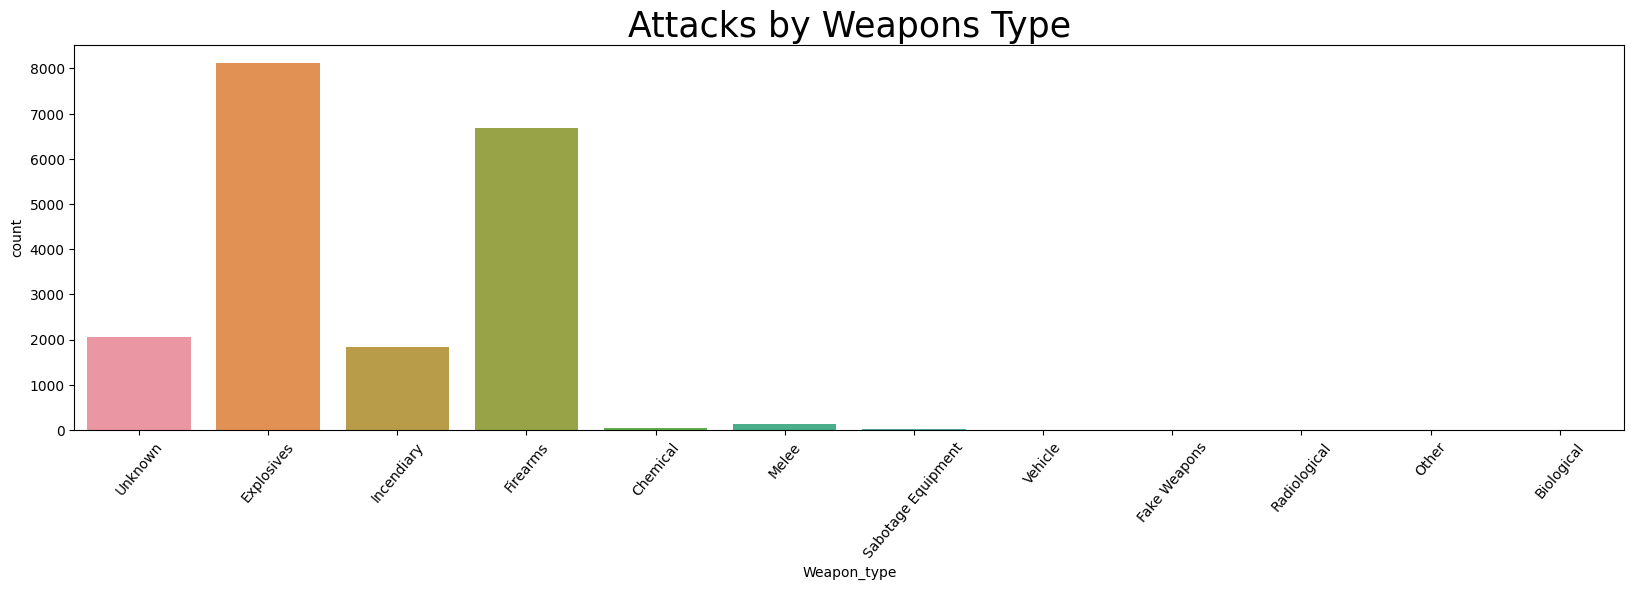

In [40]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 50)
plt.title('Attacks by Weapons Type', fontsize = 25)
sns.countplot(x=terrorism_df.Weapon_type);


Attacks by year


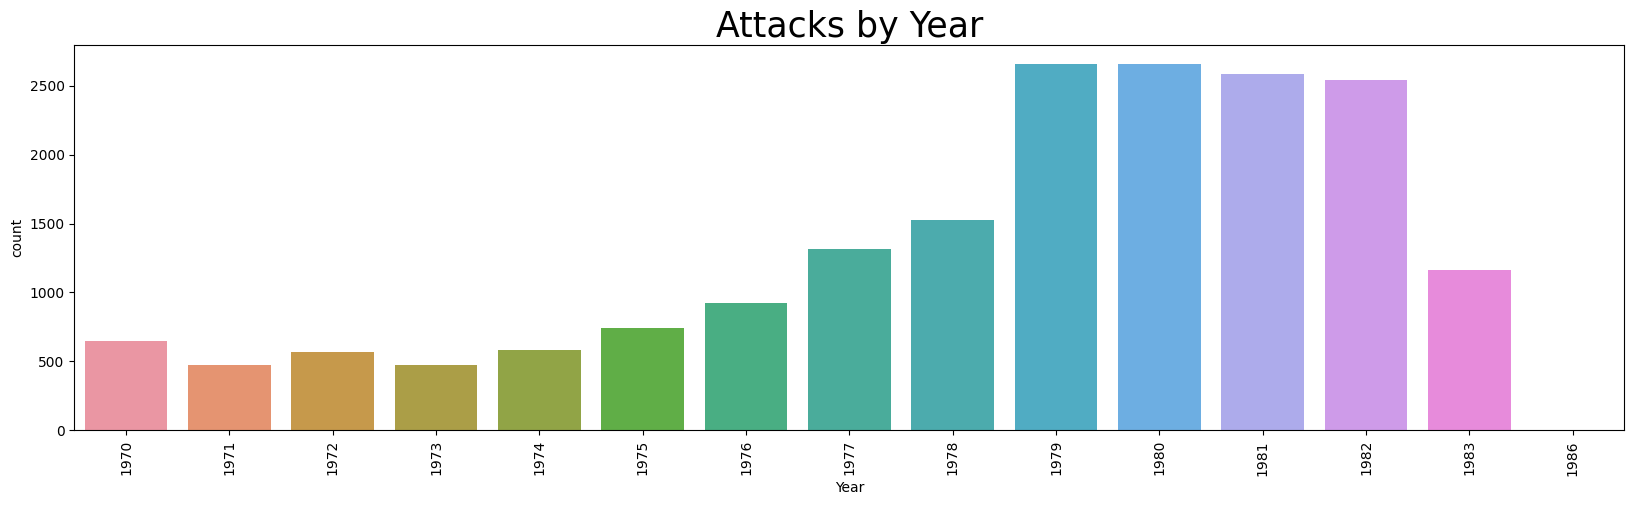

In [41]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year', fontsize = 25)
sns.countplot(x=terrorism_df.Year);


Attacks by day

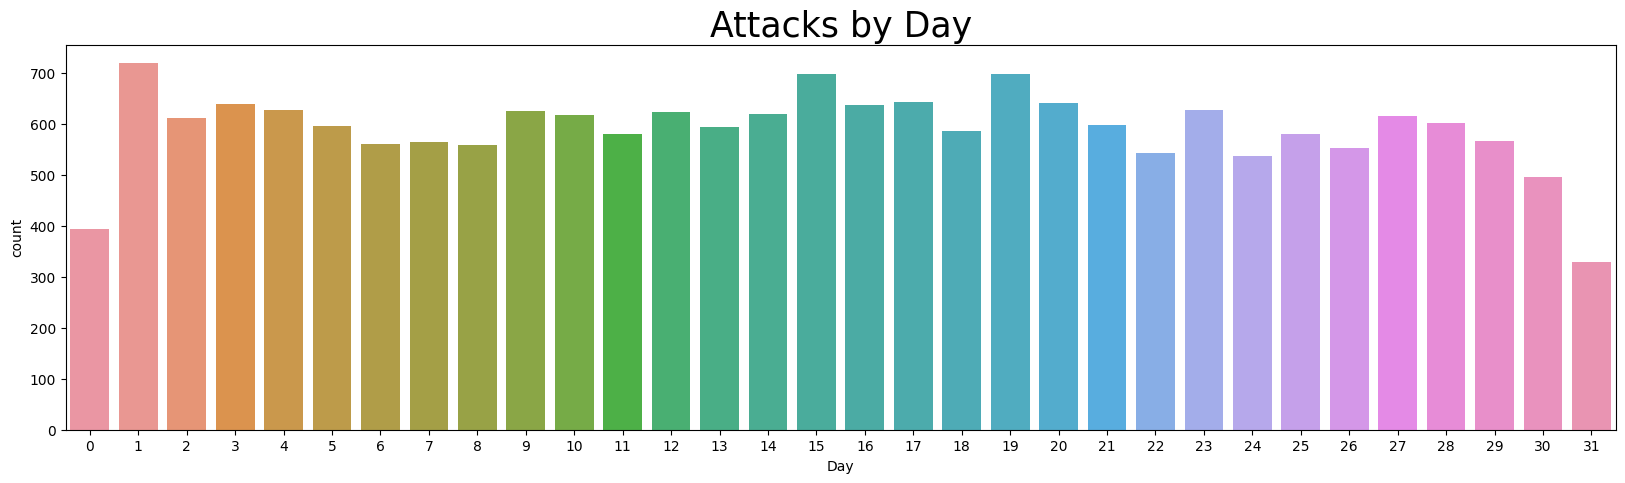

In [45]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Day', fontsize = 25)
sns.countplot(x=terrorism_df.Day);


Cities with most attacks

Attacks by region

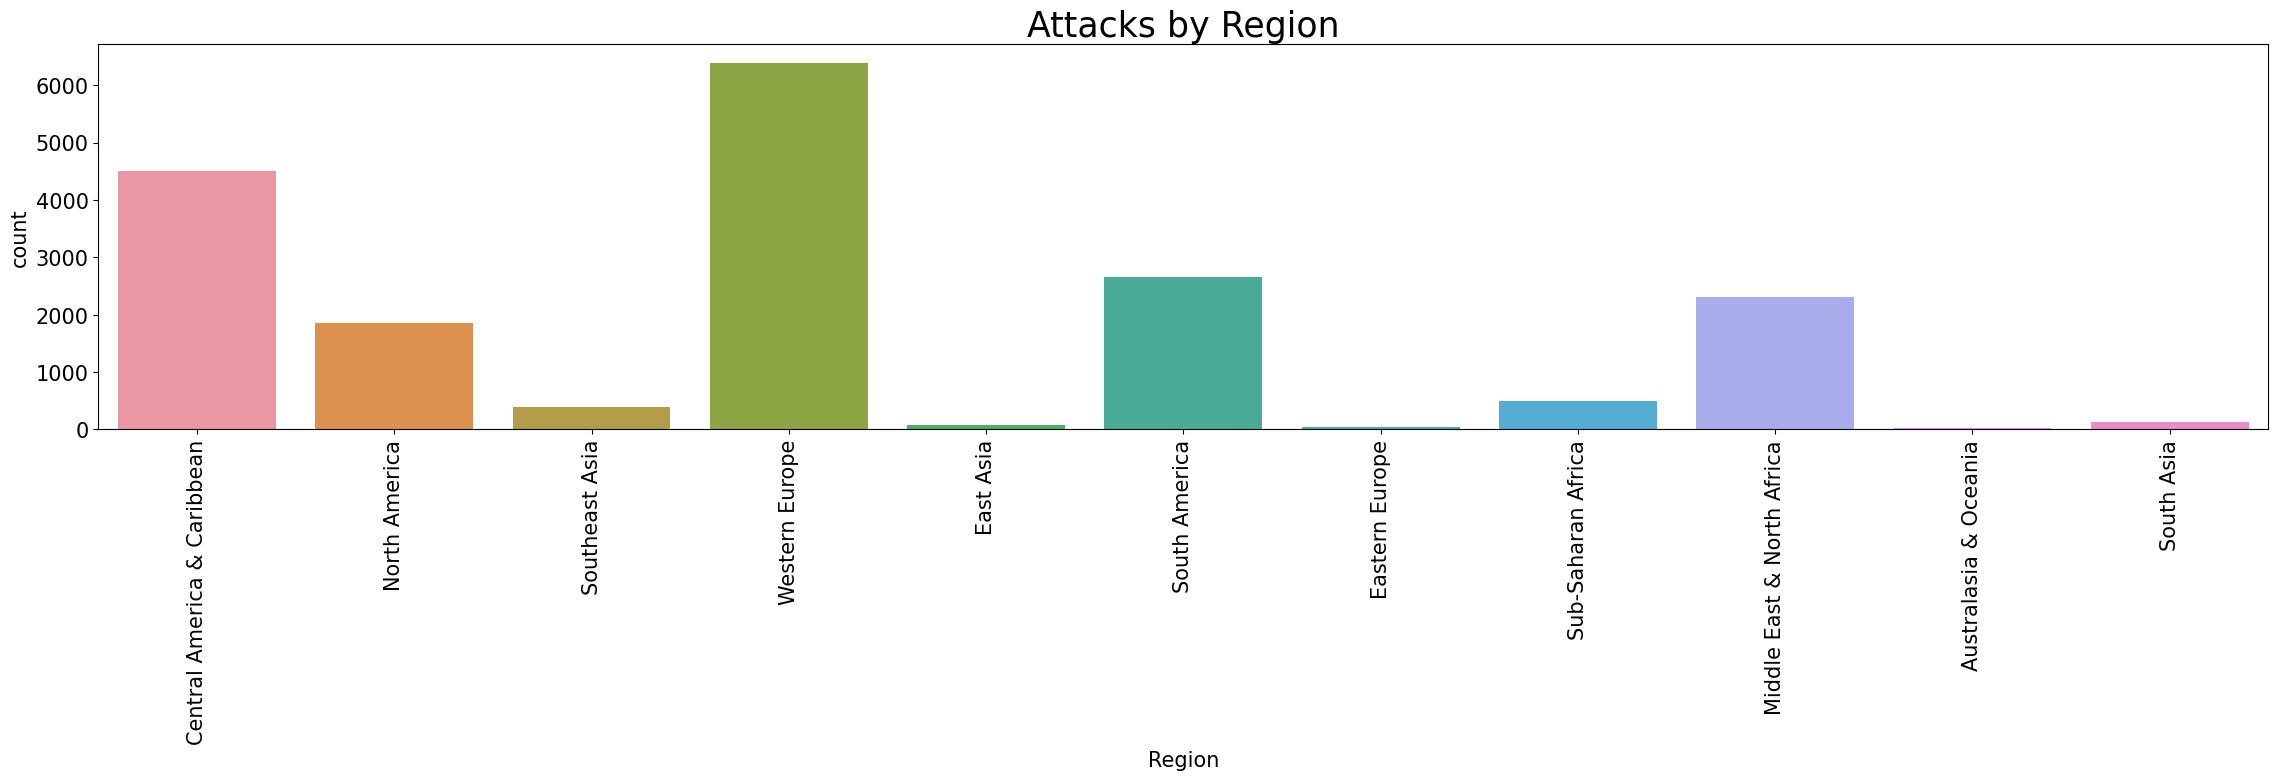

In [49]:
plt.figure(figsize=(28,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Attacks by Region', fontsize =25)
sns.countplot(x=terrorism_df.Region);


Attack based on target type

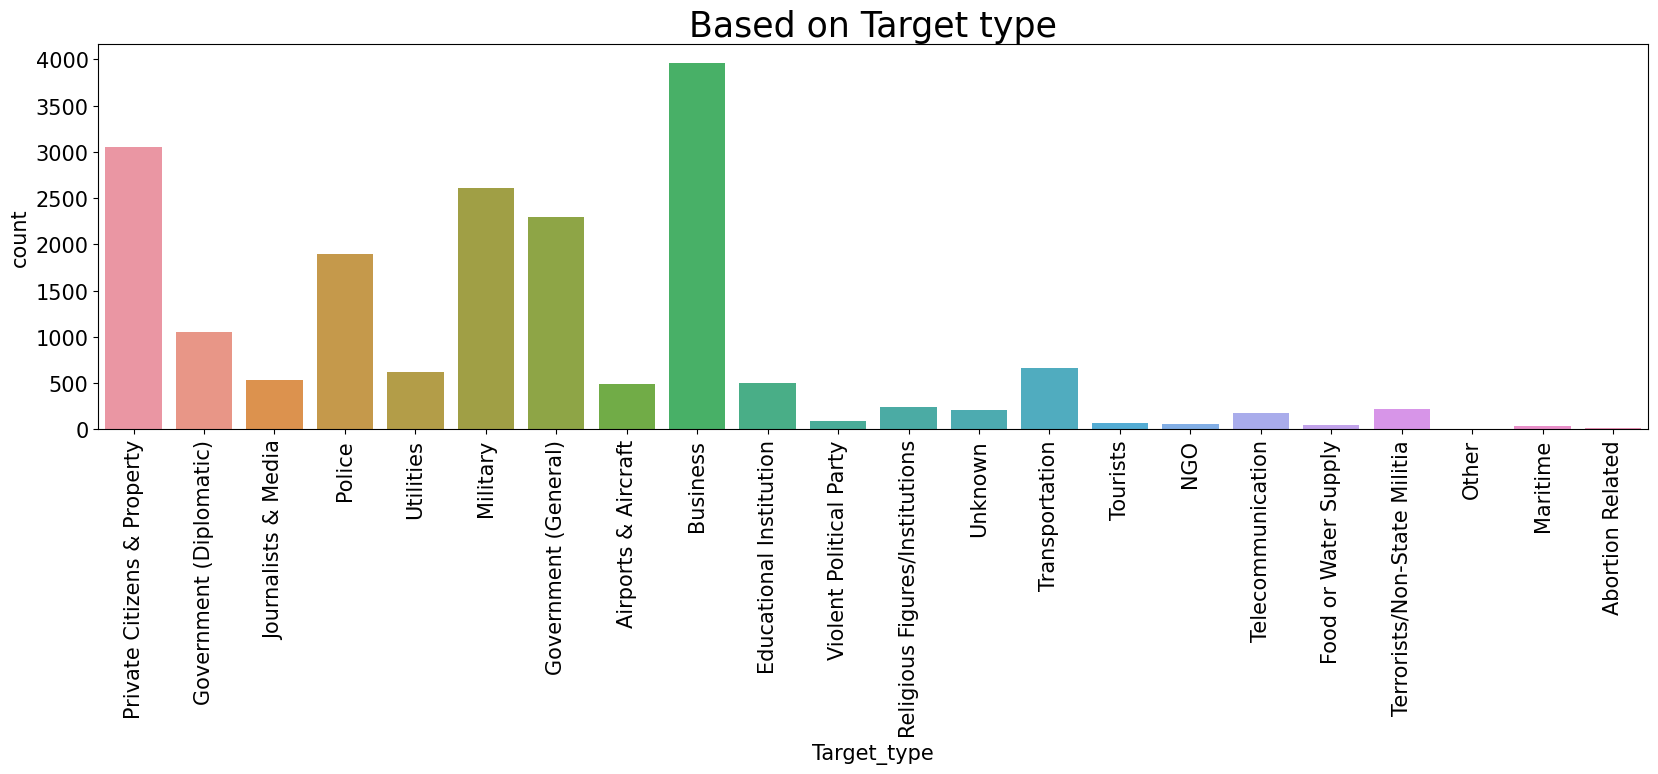

In [50]:
plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Based on Target type', fontsize =25)
sns.countplot(x=terrorism_df.Target_type);



Attacks based on attack type

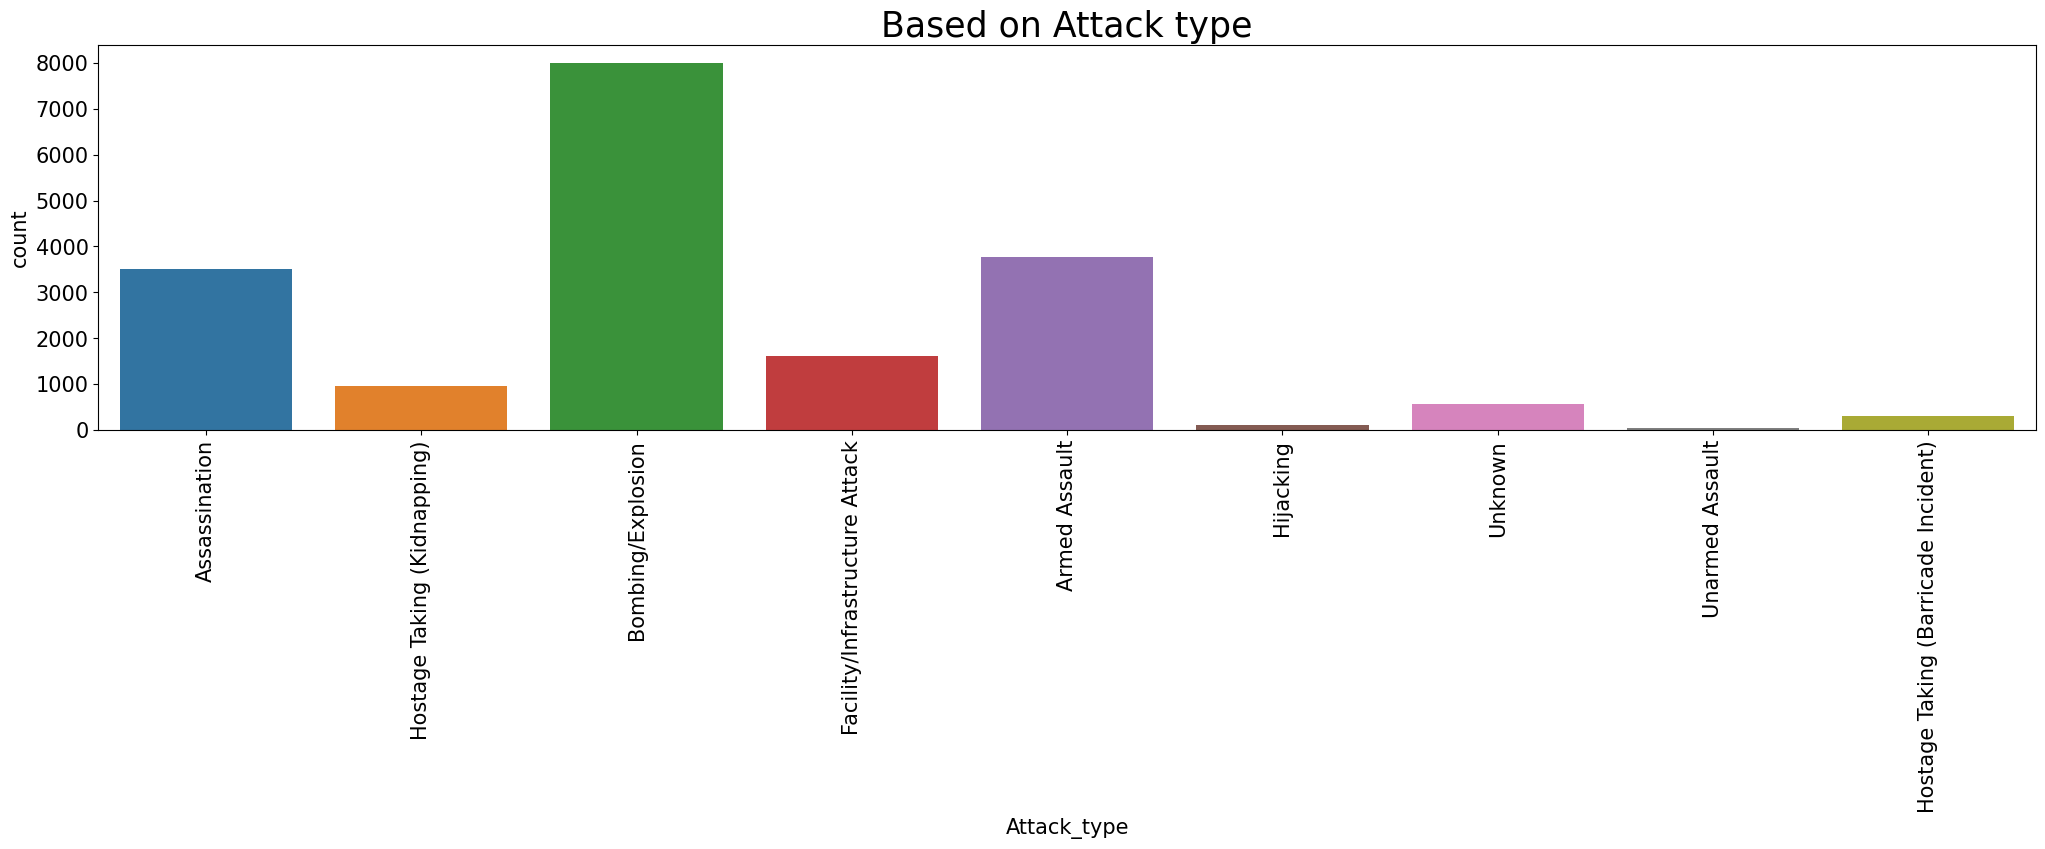

In [51]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Based on Attack type', fontsize = 25)
sns.countplot(x=terrorism_df.Attack_type);
